In [1]:
# import the libraries
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers
import numpy as np

In [2]:
# size of the encoded representation, i.e. of the hidden layer
encoding_dim = 64
# MNIST image size - 28x28
input_img = Input(shape=(784,))
# encoding layer, l1 regularization is used, so only few units fire at a given time
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-20))(input_img)
# decoding layer
decoded = Dense(784, activation='sigmoid')(encoded)

# The model
autoencoder = Model(input_img, decoded)

In [3]:
# Encoder model 
encoder = Model(input_img, encoded)

In [4]:
# Decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder = Model(encoded_input, autoencoder.layers[-1](encoded_input))

In [5]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [6]:
# labels aren't requried 
(x_train,_), (x_test,_) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# number of epochs increased since regularization term added, which prevents overfitting
# the loss hs reduced to 0.08 from 0.1
autoencoder.fit(x_train, x_train, epochs = 100, batch_size = 256, shuffle = True)

Epoch 1/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.3420
Epoch 2/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2547
Epoch 3/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.2281
Epoch 4/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.2083
Epoch 5/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.1944
Epoch 6/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.1841
Epoch 7/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.1759
Epoch 8/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.1691
Epoch 9/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.1632
Epoch 10/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1579
Epoch 11/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.1533
Epoch 12/100
60000/60000 [===============

60000/60000 [==============================] - 3s 43us/step - loss: 0.0828
Epoch 95/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.0827
Epoch 96/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.0826
Epoch 97/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.0825
Epoch 98/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.0823
Epoch 99/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.0822
Epoch 100/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.0821


In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

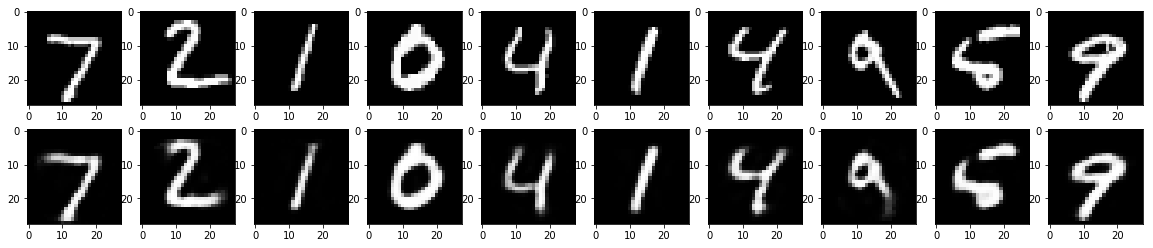

In [12]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # input images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    # reconstructed images
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    
plt.show()